<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [2]:
df = pd.read_csv("Employee-attrition.csv")


In [33]:
df.head() #prints out the first five rows

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [32]:
df.tail() #prints out the last five rows

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


# Accessing the main DataFrame components

In [5]:
columns = df.columns
index = df.index
data = df.values

In [6]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [7]:
index

RangeIndex(start=0, stop=49653, step=1)

In [8]:
data

array([[1318, '12/31/2006 0:00', '1/3/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2007 0:00', '1/3/1954', ..., 2007, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2008 0:00', '1/3/1954', ..., 2008, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [8279, '12/1/2015 0:00', '7/18/1994', ..., 2015, 'TERMINATED',
        'STORES'],
       [8296, '12/1/2013 0:00', '9/2/1994', ..., 2013, 'TERMINATED',
        'STORES'],
       [8321, '12/1/2014 0:00', '11/28/1994', ..., 2014, 'TERMINATED',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find Shape of Data Frame

In [9]:
# A:
df.shape

(49653, 18)

#### 1.B Find Data Tyeps of Data Frame

In [34]:
# A:
df.dtypes #note 'object' types are unassigned data frame. In the data cleaning process, 'object' should be changed to string, date, a more correct variable ect. 

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

#### 1.C Find Number of Data Types in a Data Frame



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [11]:
df.dtypes.value_counts()

object    13
int64      5
dtype: int64

#### 1.D Use Info

Use info and explore difference.

In [12]:
# A:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

# 2. Selecting Column in Data Frame

#### 2.A Check Values of Job_Title column

In [13]:
# A:
df['job_title']

0                 CEO
1                 CEO
2                 CEO
3                 CEO
4                 CEO
             ...     
49648    Dairy Person
49649         Cashier
49650         Cashier
49651         Cashier
49652         Cashier
Name: job_title, Length: 49653, dtype: object

In [35]:
df.job_title #also works

0                 CEO
1                 CEO
2                 CEO
3                 CEO
4                 CEO
             ...     
49648    Dairy Person
49649         Cashier
49650         Cashier
49651         Cashier
49652         Cashier
Name: job_title, Length: 49653, dtype: object

#### 2.B Find How Many Rows Are in Each Job Title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [14]:
# A:
df['job_title'].value_counts()
# using the below function from pandas. note that when using [], a '.' isnt needed after df.
# DataFrame.value_counts(subset=None, normalize=False, sort=True, ascending=False)

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Investment Analyst                   20
Compensation Analyst                 20
Auditor                              20
Systems Analyst                      20
Corporate Lawyer                     17


#### 2.C [BONUS] Write A Function to Row Count



```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



In [37]:
def row_count(column_name):
    number_of_rows = len(column_name)
    return number_of_rows

In [39]:
row_count(df.job_title) #example, find rows in job title

49653

#### 2.D Describe 'Age'

Find count,  mean,  std, min, max of column 'age'

In [15]:
# A:
df['age'].describe()

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64

In [41]:
age = df['age']
age.describe() #same thing, broken down.

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64

##### 2.E [BONUS] Describe 'All Numeric Columns of Data Frame

Find count, mean, std, min, max of of all columns of dataframe

In [16]:
# A:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


# 3. Making The Index Meaningful

In [43]:
df.set_index("EmployeeID", inplace=True) #this makes the index, the employee ID, which is meaningful

In [44]:
print(df.index)

Int64Index([1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318,
            ...
            8188, 8214, 8223, 8226, 8231, 8258, 8264, 8279, 8296, 8321],
           dtype='int64', name='EmployeeID', length=49653)


#### 3.A Find A Specifc Row Using Index

In [17]:
# A:
df.iloc[1234]

EmployeeID                        1619
recorddate_key         12/31/2009 0:00
birthdate_key                7/27/1950
orighiredate_key             6/26/1990
terminationdate_key          7/27/2015
age                                 59
length_of_service                   19
city_name                      Nanaimo
department_name                  Meats
job_title                  Meat Cutter
store_name                          18
gender_short                         F
gender_full                     Female
termreason_desc         Not Applicable
termtype_desc           Not Applicable
STATUS_YEAR                       2009
STATUS                          ACTIVE
BUSINESS_UNIT                   STORES
Name: 1234, dtype: object

#### 3.B Sort Data Frame using Index

In [18]:
# A:
df.sort_index()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


#### 3.C [BONUS] Sort Data Frame using Age

In [46]:
# A:
df.sort_values(by=['age'], ascending=[0])

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
2800,6/1/2007 0:00,6/3/1942,12/9/1993,6/3/2007,65,13,Prince George,Meats,Meat Cutter,26,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2674,2/1/2007 0:00,2/11/1942,8/19/1993,2/11/2007,65,13,Kelowna,Meats,Meat Cutter,16,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2598,11/1/2006 0:00,11/22/1941,5/30/1993,11/22/2006,65,13,Abbotsford,Produce,Produce Clerk,1,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
2599,11/1/2006 0:00,11/25/1941,6/2/1993,11/25/2006,65,13,Fort Nelson,Meats,Meat Cutter,11,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
2608,12/1/2006 0:00,12/1/1941,6/8/1993,12/1/2006,65,13,Vancouver,Dairy,Dairy Person,35,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8283,12/31/2013 0:00,8/11/1994,9/27/2013,1/1/1900,19,0,Vernon,Customer Service,Cashier,36,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8222,12/31/2013 0:00,2/1/1994,6/18/2013,1/1/1900,19,0,Williams Lake,Customer Service,Cashier,40,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8221,12/31/2013 0:00,1/28/1994,6/16/2013,1/1/1900,19,0,New Westminster,Customer Service,Cashier,21,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES


#### 3.D [BONUS] Using Sample Select Any Row 

In [20]:
# A:

# 4. Query Data Frame

#### 4.A Find Rows Where Job_Title is CEO

In [47]:
# A:
df[df['job_title'] == 'CEO']

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE


#### 4.B Group By Age

In [48]:
# A:
df.groupby(['age']).count()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
age,,,,,,,,,,,,,,,,
19,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158
20,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408
21,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703
22,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815
23,960,960,960,960,960,960,960,960,960,960,960,960,960,960,960,960
24,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111
25,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197
26,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
27,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235


In [23]:
# extracting another column, example
df.groupby(['age'])['EmployeeID'].count()

age
19     158
20     408
21     703
22     815
23     960
24    1111
25    1197
26    1210
27    1235
28    1225
29    1227
30    1212
31    1146
32    1153
33    1164
34    1188
35    1189
36    1176
37    1149
38    1156
39    1142
40    1130
41    1135
42    1152
43    1150
44    1157
45    1141
46    1161
47    1173
48    1180
49    1196
50    1218
51    1207
52    1188
53    1188
54    1159
55    1168
56    1154
57    1130
58    1130
59    1128
60    1109
61     757
62     712
63     667
64     646
65     593
Name: EmployeeID, dtype: int64

# 5. Visualization

#### 5.A Plot Histogram of Age 

In [24]:
# A: 
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

Text(0.5, 1.0, 'Histogram of Age')

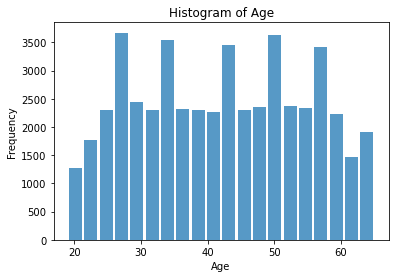

In [25]:
plt.hist(x=df['age'], bins=20, alpha=0.75, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age') #NOTE: df.age is the same as df['age']

#### 5.B BoxPlot of Age

In [26]:
# A:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will produce a n

Text(0.5, 1.0, 'Histogram of Age')

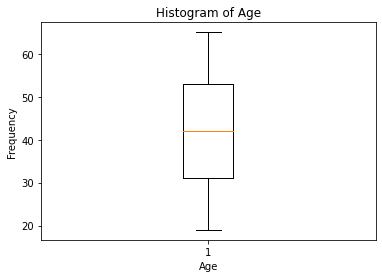

In [27]:
plt.boxplot(x=df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

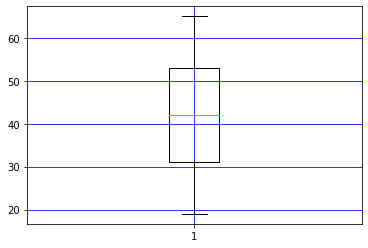

In [53]:
plt.boxplot(df.age) #accessing same data, alternative method.
plt.yscale('linear') #additional customisations.
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.show()

#### 5.C Scatterplot of age and length_of_service

In [28]:
# A:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : scalar or array-like, shape (n, )
        The data positions.
    
    s : scalar or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single 

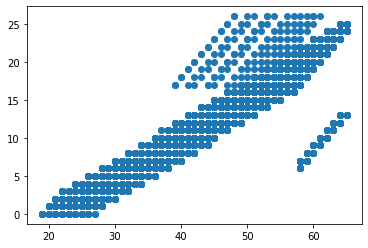

In [51]:
plt.scatter(df.age, df.length_of_service)
plt.show() #what do I use as y value?

#### 5.D Plot Histogram of store_name

Text(0.5, 1.0, 'Histogram of Store Name')

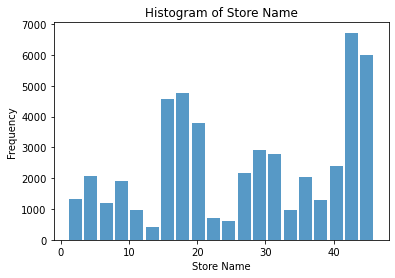

In [30]:
# A:
plt.hist(x=df['store_name'], bins=20, alpha=0.75, rwidth=0.85)
plt.xlabel('Store Name')
plt.ylabel('Frequency')
plt.title('Histogram of Store Name')

#### 5.E Print Statistical Summary of Age

In [31]:
# A:
df['age'].describe() #this is the same as a previous, should i be using a matplotlib function?

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64

In [50]:
print('statistical summary of observations =',stats.describe(df.age)) #this is correct.

statistical summary of observations = DescribeResult(nobs=49653, minmax=(19, 65), mean=42.077034620264634, variance=154.4367264677654, skewness=0.023093117697645202, kurtosis=-1.1473302603578608)




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



